In [95]:
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.display import HTML


In [96]:
df = pd.read_csv('../data/clean_data.csv')
df

,economy,year,gdp_per_capita,gdp_growth_rate,unemployment_rate,inflation_rate,life_expectancy_at_birth,infant_mortality_rate,population_growth_rate,literacy_rate,govt_expenditure_on_education,pupil_teacher_ratio
0,AUS,2000,45858.580093,3.921518,6.288,4.457435,79.234146,6.2,1.144473,NaN,4.759340,NaN
1,AUS,2001,46190.381208,2.025127,6.747,4.407135,79.634146,6.1,1.283968,NaN,5.222616,NaN
2,AUS,2002,47485.341090,3.979634,6.375,2.981575,79.936585,6.0,1.137539,NaN,5.305696,NaN
3,AUS,2003,48393.136722,3.090687,5.933,2.732596,80.239024,5.9,1.150193,NaN,5.245258,NaN
4,AUS,2004,49901.015296,4.224322,5.399,2.343255,80.490244,5.8,1.069198,NaN,5.193072,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
248,ZAF,2018,6253.118996,1.556784,24.218,4.517165,65.674000,36.1,1.225530,NaN,5.644010,NaN
249,ZAF,2019,6188.703558,0.259936,25.538,4.120246,66.175000,35.6,1.295074,95.0,5.911580,NaN
250,ZAF,2020,5748.897845,-5.963358,24.339,3.210036,65.252000,35.3,1.223179,NaN,6.170670,NaN
251,ZAF,2021,5959.443657,4.703062,28.770,4.611672,62.341000,34.7,0.998920,90.0,6.549030,NaN


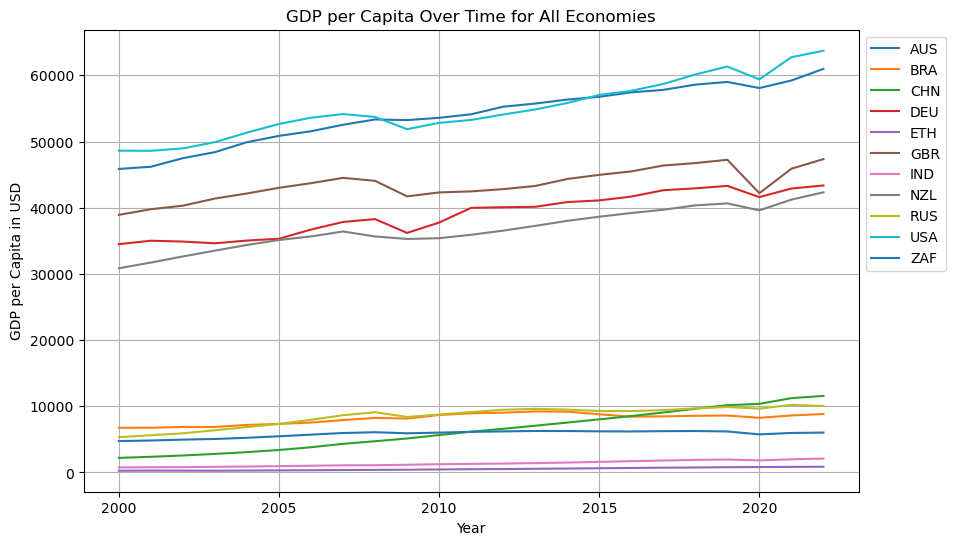

In [97]:
plt.figure(figsize=(10, 6))
for economy in df['economy'].unique():
    economy_data = df[df['economy'] == economy]
    plt.plot(economy_data['year'], economy_data['gdp_per_capita'], label=economy)

plt.xlabel('Year')
plt.ylabel('GDP per Capita in USD')
plt.title('GDP per Capita Over Time for All Economies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [98]:
import pandas as pd


# Calculate the average GDP per capita for each country
average_gdp_per_capita = df.groupby('economy')['gdp_per_capita'].mean().reset_index()

# Rename the columns for clarity
average_gdp_per_capita.columns = ['economy', 'average_gdp_per_capita']

# Sort the DataFrame by average GDP per capita in descending order
average_gdp_per_capita = average_gdp_per_capita.sort_values(by='average_gdp_per_capita', ascending=False)

# Display the result
average_gdp_per_capita


## Developed: USA, AUS, GBR, DEU, NZL
## Developing Country: RUS, BRA,CHN, IND, ZAF, IND,ETH

,economy,average_gdp_per_capita
9,USA,54997.405706
0,AUS,54010.699997
5,GBR,43519.751376
3,DEU,38985.311121
7,NZL,36781.178815
8,RUS,8491.154424
1,BRA,8134.522264
2,CHN,6339.333000
10,ZAF,5806.949851
6,IND,1343.303366


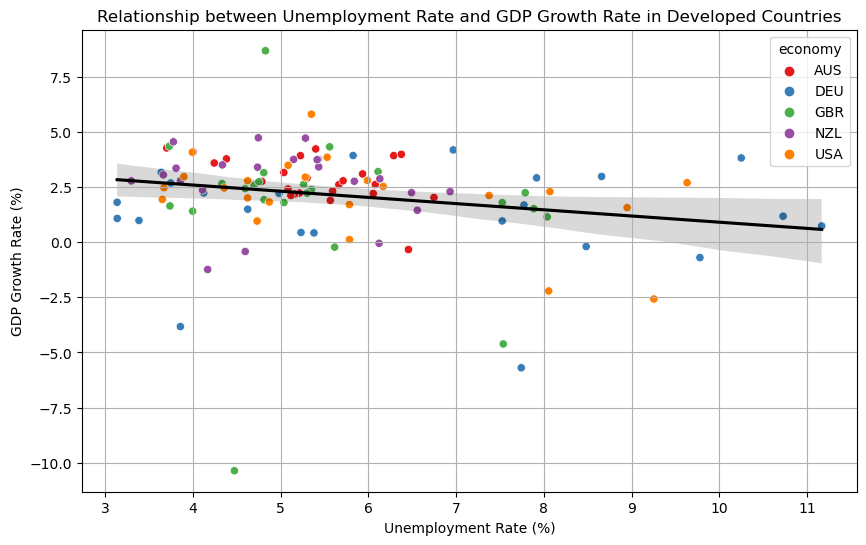

In [99]:
developed_df = df.query("economy in ['USA', 'AUS', 'GBR', 'DEU', 'NZL']")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=developed_df, x='unemployment_rate', y='gdp_growth_rate', hue='economy', palette='Set1')
sns.regplot(data=developed_df, x='unemployment_rate', y='gdp_growth_rate', scatter=False, color='black')

# Add labels and title
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Relationship between Unemployment Rate and GDP Growth Rate in Developed Countries')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

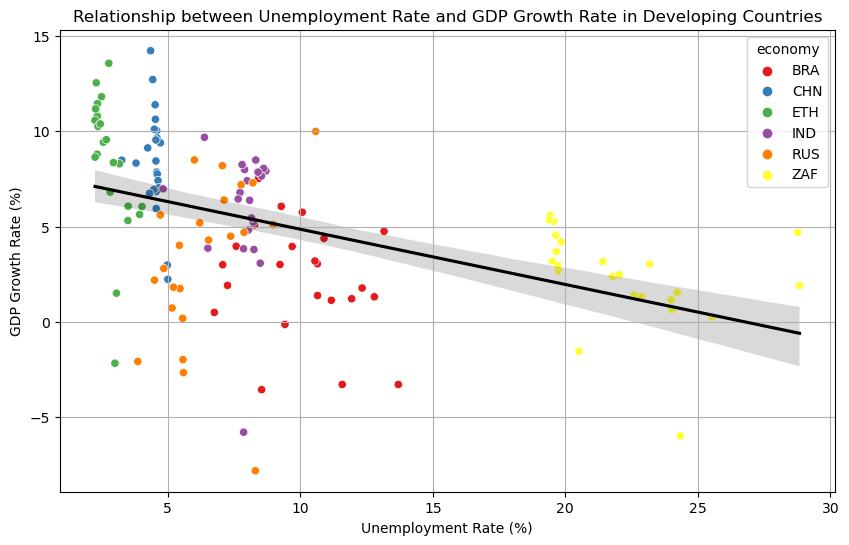

In [100]:
developing_df = df.query("economy in ['RUS', 'BRA', 'CHN', 'IND', 'ZAF', 'ETH']")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=developing_df, x='unemployment_rate', y='gdp_growth_rate', hue='economy', palette='Set1')
sns.regplot(data=developing_df, x='unemployment_rate', y='gdp_growth_rate', scatter=False, color='black')

# Add labels and title
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Relationship between Unemployment Rate and GDP Growth Rate in Developing Countries')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

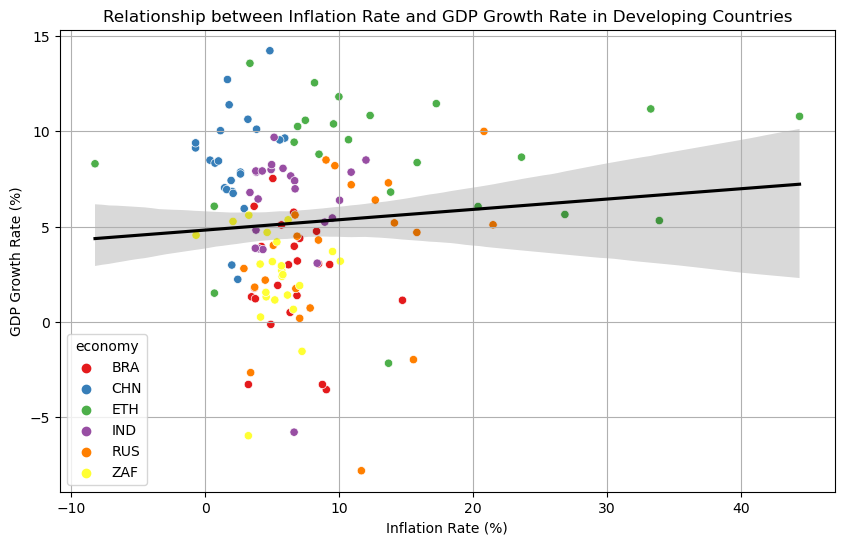

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=developing_df, x='inflation_rate', y='gdp_growth_rate', hue='economy', palette='Set1')
sns.regplot(data=developing_df, x='inflation_rate', y='gdp_growth_rate', scatter=False, color='black')

# Add labels and title
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Relationship between Inflation Rate and GDP Growth Rate in Developing Countries')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

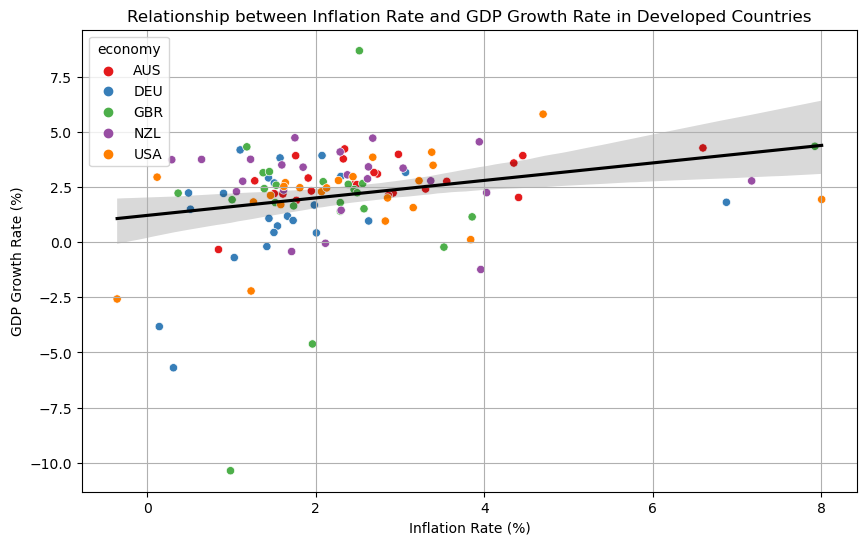

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=developed_df, x='inflation_rate', y='gdp_growth_rate', hue='economy', palette='Set1')
sns.regplot(data=developed_df, x='inflation_rate', y='gdp_growth_rate', scatter=False, color='black')

# Add labels and title
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Relationship between Inflation Rate and GDP Growth Rate in Developed Countries')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

In [103]:

independent_vars = [
    'unemployment_rate',
    'inflation_rate',
    'life_expectancy_at_birth',
    'infant_mortality_rate',
    'population_growth_rate',
]

developed_countries = ['USA', 'AUS', 'GBR', 'DEU', 'NZL']

regression_results = {}

for country in developed_countries:
    model = smf.ols(formula='gdp_per_capita ~ ' + ' + '.join(independent_vars), data=df[df['economy'] == country]).fit()
    regression_results[country] = model

stargazer = Stargazer([regression_results[country] for country in developed_countries])

stargazer.custom_columns(developed_countries, [1] * len(developed_countries))

HTML(stargazer.render_html())

In [104]:

developed_countries = ['RUS', 'BRA', 'CHN', 'IND', 'ZAF', 'ETH']

regression_results = {}

for country in developed_countries:
    model = smf.ols(formula='gdp_per_capita ~ ' + ' + '.join(independent_vars), data=df[df['economy'] == country]).fit()
    regression_results[country] = model

stargazer = Stargazer([regression_results[country] for country in developed_countries])

stargazer.custom_columns(developed_countries, [1] * len(developed_countries))

HTML(stargazer.render_html())

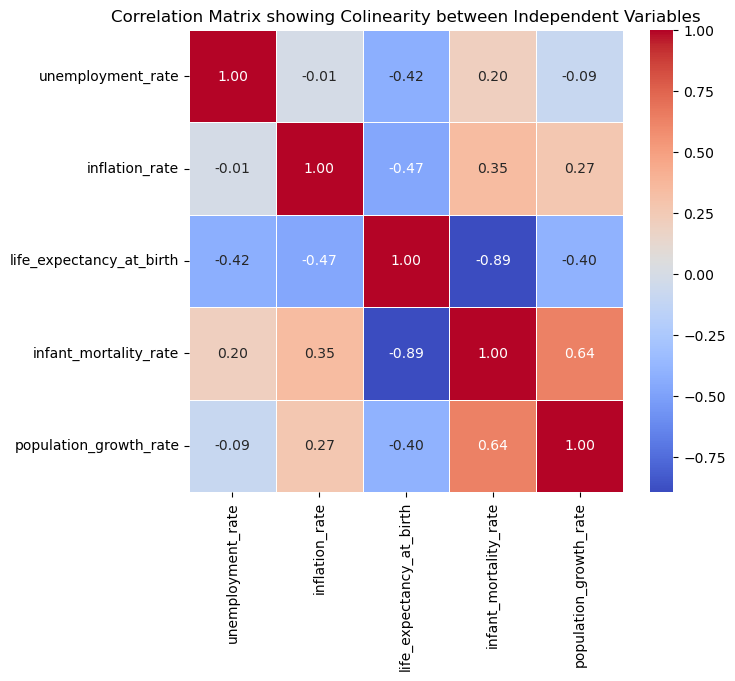

In [105]:
cor_matrix = df[independent_vars].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix showing Colinearity between Independent Variables")
plt.show()

In [106]:

nan_counts = df.groupby('economy').apply(lambda x: x.isna().sum())
nan_counts

/var/folders/2j/nfy340790wd7lt4ykqtyjbt40000gn/T/ipykernel_33273/777033554.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts = df.groupby('economy').apply(lambda x: x.isna().sum())


,economy,year,gdp_per_capita,gdp_growth_rate,unemployment_rate,inflation_rate,life_expectancy_at_birth,infant_mortality_rate,population_growth_rate,literacy_rate,govt_expenditure_on_education,pupil_teacher_ratio
economy,,,,,,,,,,,,
AUS,0,0,0,0,0,0,0,0,0,23,0,23
BRA,0,0,0,0,0,0,0,0,0,7,2,6
CHN,0,0,0,0,0,0,0,0,0,20,5,9
DEU,0,0,0,0,0,0,0,0,0,23,0,5
ETH,0,0,0,0,0,0,0,0,0,18,3,18
GBR,0,0,0,0,0,0,0,0,0,23,0,6
IND,0,0,0,0,0,0,0,0,0,19,4,13
NZL,0,0,0,0,0,0,0,0,0,23,9,6
RUS,0,0,0,0,0,1,0,0,0,20,1,8


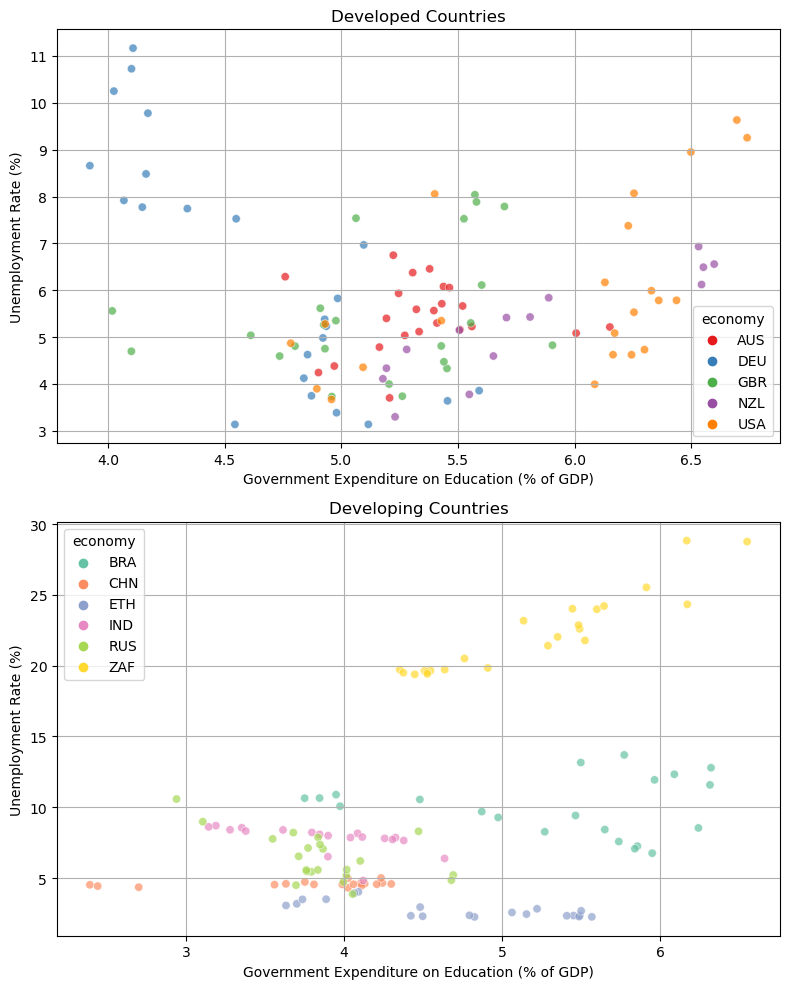

In [115]:
plt.figure(figsize=(8, 10))

# Create scatter plots with regression lines for developed countries
plt.subplot(2, 1, 1)
sns.scatterplot(x='govt_expenditure_on_education', y='unemployment_rate', hue='economy', data=developed_df, palette='Set1', alpha=0.7)
#sns.regplot(x='govt_expenditure_on_education', y='unemployment_rate', data=developed_df, scatter=False, color='red')
plt.xlabel('Government Expenditure on Education (% of GDP)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Developed Countries')
plt.grid(True)

# Create scatter plots with regression lines for developing countries
plt.subplot(2,1,2)
sns.scatterplot(x='govt_expenditure_on_education', y='unemployment_rate', hue='economy', data=developing_df, palette='Set2', alpha=0.7)
#sns.regplot(x='govt_expenditure_on_education', y='unemployment_rate', data=developing_df, scatter=False, color='red')
plt.xlabel('Government Expenditure on Education (% of GDP)')
plt.ylabel('Unemployment Rate (%)')
plt.title('Developing Countries')
plt.grid(True)

plt.tight_layout()
plt.show()
